In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm, chisquare
from math import sqrt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
import re
df=pd.read_csv("IDS-Data-Collection.csv")

In [3]:
df.columns

Index(['Timestamp', 'Gender', 'Height', 'Weight', 'DOB', 'Age', 'Sun_Sign',
       'CGPA', 'Rate_Programming', 'PL', 'Sim_Course', 'Focus', 'DS_DA',
       'Mean', 'Median', 'Sleep_time', 'sleep_duration', 'prefer_maths',
       'Engg_Choice', 'course_instructor', 'physical_activity'],
      dtype='object')

In [4]:
columns_to_keep=['Gender', 'Height', 'Weight', 'DOB', 'Age','CGPA', 'Rate_Programming', 'PL','Mean', 'Median']
df=df[columns_to_keep]
df.head(5)

,Gender,Height,Weight,DOB,Age,CGPA,Rate_Programming,PL,Mean,Median
0,Female,5'3,74,7/30/1999,19.0,8.29,3,C++,6.0,8
1,Male,176,62,6/4/1999,19.0,8.27,4,C,6.0,9
2,Male,176,62,6/4/1999,19.0,8.27,4,C,6.0,9
3,Female,145,60,2/21/2000,18.0,9.21,3,Python,6.0,9
4,Male,185,56,8/15/1999,19.0,8.46,4,C,6.0,8


In [5]:
print(len(df))

182


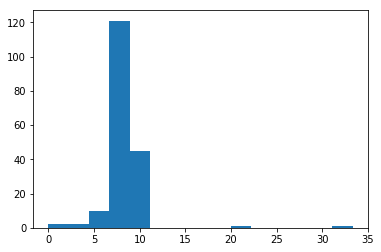

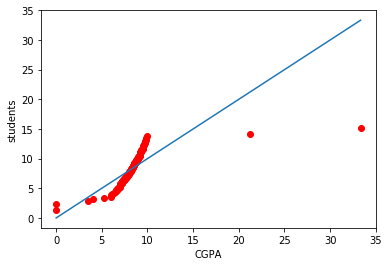

In [58]:
plt.hist(df.CGPA,bins=15)
plt.show()

def normality_check(data):
    pos=[]
    t_q=[]
    data=np.sort(np.array(data))
    pos=[(i-0.5)/len(data) for i in range(1,len(data)+1)]
    t_q=[norm.ppf(i,np.mean(data),np.std(data)) for i in pos]
    plt.plot(data,t_q,'ro',data,data)
    plt.xlabel("CGPA")
    plt.ylabel("students")
    plt.show()
    
x=df.CGPA
normality_check(x)

In [10]:
print(df.describe())

                Age        CGPA  Rate_Programming          Mean
count  1.820000e+02  182.000000        182.000000  1.790000e+02
mean   7.527474e+07    8.258984          3.131868  6.897040e+06
std    1.015512e+09    2.493025          0.837106  9.227594e+07
min    0.000000e+00    0.000000          1.000000  2.000000e-10
25%    1.800000e+01    7.515000          3.000000  6.000000e+00
50%    1.900000e+01    8.270000          3.000000  6.000000e+00
75%    1.900000e+01    8.900000          4.000000  6.000000e+00
max    1.370000e+10   33.340000          5.000000  1.234568e+09


In [7]:
to_drop=['Timestamp','Sun_Sign',
       'Sim_Course', 'Focus', 'DS_DA',
        'Sleep_time', 'sleep_duration', 'prefer_maths',
       'Engg_Choice', 'course_instructor', 'physical_activity']


In [8]:
print(to_drop)


['Timestamp', 'Sun_Sign', 'Sim_Course', 'Focus', 'DS_DA', 'Sleep_time', 'sleep_duration', 'prefer_maths', 'Engg_Choice', 'course_instructor', 'physical_activity']


In [9]:
print(df['Gender'].value_counts())

Male      128
Female     54
Name: Gender, dtype: int64


In [10]:
df.CGPA

0      8.290
1      8.270
2      8.270
3      9.210
4      8.460
5      9.700
6      7.460
7      9.420
8      9.170
9      8.250
10     6.500
11     8.750
12     7.250
13     7.940
14     8.620
15     7.230
16     8.750
17     9.520
18     7.560
19     7.920
20     6.300
21     9.540
22     7.565
23     6.000
24     7.650
25     9.190
26     7.850
27     9.040
28     8.790
29     8.500
       ...  
152    7.200
153    6.670
154    9.100
155    7.000
156    7.880
157    7.750
158    8.000
159    7.750
160    9.325
161    8.670
162    8.200
163    8.400
164    8.400
165    7.000
166    7.730
167    7.000
168    8.700
169    8.580
170    8.500
171    8.960
172    7.000
173    7.300
174    8.830
175    8.410
176    6.400
177    7.580
178    9.820
179    8.000
180    9.220
181    8.050
Name: CGPA, Length: 182, dtype: float64

In [11]:
df.Mean

0       6.0
1       6.0
2       6.0
3       6.0
4       6.0
5       6.0
6       6.0
7       6.0
8       6.0
9       6.0
10      9.0
11      6.0
12     15.0
13      6.0
14      6.0
15     15.0
16      6.0
17      6.0
18     15.0
19      6.0
20      6.0
21      6.0
22      6.0
23      6.0
24      6.0
25      6.0
26      6.0
27      6.0
28      6.0
29      6.0
       ... 
152     6.0
153     6.0
154     6.0
155     6.0
156     6.0
157     6.0
158     6.0
159    15.0
160     6.0
161     8.0
162     5.6
163     6.0
164     6.0
165     6.0
166     6.0
167     6.0
168     6.0
169     6.0
170     4.0
171     NaN
172     6.0
173     6.0
174     6.0
175     6.0
176     6.0
177     6.0
178     6.0
179     NaN
180     6.0
181     6.0
Name: Mean, Length: 182, dtype: float64

In [12]:
print(df)

     Gender  Height Weight         DOB   Age   CGPA  Rate_Programming      PL  \
0    Female     5'3     74   7/30/1999  19.0  8.290                 3     C++   
1      Male     176     62    6/4/1999  19.0  8.270                 4       C   
2      Male     176     62    6/4/1999  19.0  8.270                 4       C   
3    Female     145     60   2/21/2000  18.0  9.210                 3  Python   
4      Male     185     56   8/15/1999  19.0  8.460                 4       C   
5      Male     170     79   6/21/1999  19.0  9.700                 4       C   
6      Male     168     58    6/3/1999  19.0  7.460                 2       C   
7    Female     156     63  10/25/1998  19.0  9.420                 3       C   
8    Female     158     65  10/12/1999  18.0  9.170                 3       C   
9      Male  180.34     60   7/10/1999  19.0  8.250                 4       C   
10   Female     150     51   4/13/2000  18.0  6.500                 2       C   
11     Male   165.1     64  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B8E5EF0>,
      dtype=object)

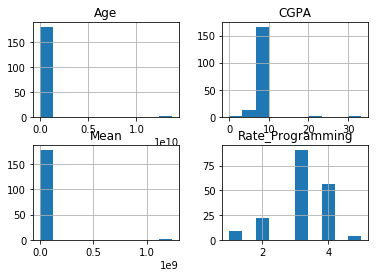

In [13]:
df.hist()

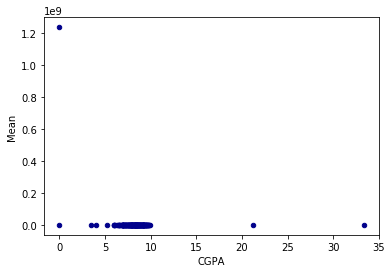

In [76]:
df.plot.scatter(x='CGPA',y='Mean',c='DarkBlue')

In [14]:
data_count=df.CGPA.value_counts()
print(data_count)
print(type(data_count))

7.000000    9
8.000000    7
8.750000    5
8.500000    5
9.170000    4
9.500000    4
8.200000    4
8.960000    3
8.460000    3
8.400000    3
7.800000    3
7.460000    3
6.000000    3
6.500000    3
6.800000    3
7.200000    2
8.270000    2
9.000000    2
7.750000    2
8.790000    2
8.920000    2
8.250000    2
9.210000    2
7.880000    2
8.580000    2
7.700000    2
8.300000    2
9.150000    2
8.320000    2
7.170000    2
           ..
9.710000    1
9.420000    1
9.355000    1
8.355000    1
9.540000    1
9.520000    1
6.400000    1
8.410000    1
8.650000    1
8.170000    1
7.940000    1
9.290000    1
7.350000    1
9.200000    1
7.680000    1
7.100000    1
0.000001    1
9.325000    1
9.630000    1
8.620000    1
6.300000    1
9.300000    1
8.380000    1
8.440000    1
7.790000    1
9.820000    1
9.220000    1
7.920000    1
7.330000    1
8.700000    1
Name: CGPA, Length: 110, dtype: int64
<class 'pandas.core.series.Series'>


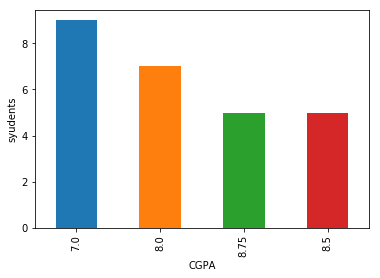

In [15]:
CGPA=[]
for i,j in data_count.iteritems():
    if(j<5):
        CGPA.append(i)
data_count=data_count.drop(CGPA)
plt.xlabel('CGPA')
plt.ylabel('syudents')
data_count.plot("bar")

In [16]:
data_count=df.PL.value_counts()

In [17]:
print(data_count)
print(type(data_count))

C         95
Python    54
C++       24
Java       5
Lol        2
R          1
None       1
Name: PL, dtype: int64
<class 'pandas.core.series.Series'>


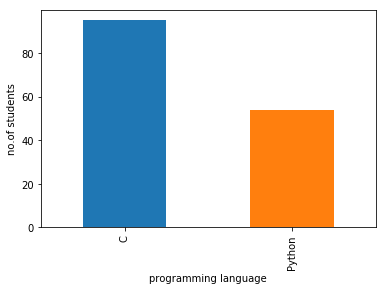

In [18]:
PL=[]
for i,j in data_count.iteritems():
    if(j<50):
        PL.append(i)
data_count=data_count.drop(PL)
plt.xlabel('programming language')
plt.ylabel('no.of students')
data_count.plot("bar")

Power_divergenceResult(statistic=247450529150.27255, pvalue=0.0)
Obsv 		 Exp
69.0 		 33.1006952332444
29.0 		 31.34232189364927
0.0 		 13.355792635404262
0.0 		 2.551035276215474
0.0 		 0.2169724276154139
1.0 		 0.008154611386401722
0.0 		 0.00013442386771478354
0.0 		 9.656093924448328e-07
0.0 		 3.0065949729873864e-09
1.0 		 4.04121180963557e-12


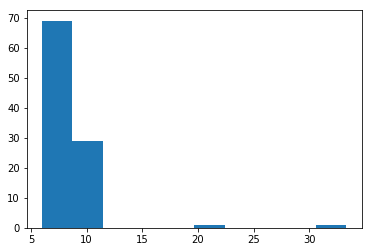

In [68]:
sample_size = 100
nbins = 10

sample = df.CGPA.sample(sample_size)
mean = np.mean(sample)
sd = np.std(sample, ddof=1)

obsv_count, bins, patches = plt.hist(sample, bins =nbins)
#getting z scores for the bins
z = [(x - mean)/sd for x in bins]

#getting area between the z-scores
prob = [norm.cdf(z[i+1]) - norm.cdf(z[i]) for i in range(nbins)]

#getting expected count : sample_size * prob
exp_count = [p * sample_size for p in prob]

#performing chi square test
test = chisquare(obsv_count, exp_count)
print(test)
print('Obsv','\t\t', 'Exp')
for i in range(nbins):
    print(obsv_count[i],'\t\t', exp_count[i])
#print(sd)

Proportion of CIs covering Pop mean 0.9


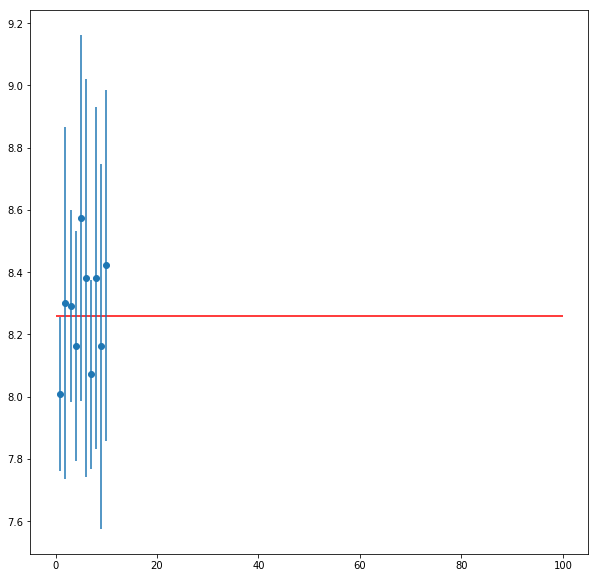

In [69]:
pop_mean = np.mean(df.CGPA)
def sampling(sample_size, no_of_samples):
    sample_means = []
    intervals = []
    count = 0
    for i in range(no_of_samples):
        sample = df.CGPA.sample(sample_size)
        sample_means.append(np.mean(sample))
        ci = norm.interval(0.95, np.mean(sample), 
                            np.std(sample, ddof =1)/sqrt(sample_size))
        intervals.append(ci)
        if pop_mean >= ci[0] and pop_mean <= ci[1]:
            count = count + 1
    print('Proportion of CIs covering Pop mean', count/no_of_samples)
    plt.figure(figsize=(10,10))
    plt.hlines(y = pop_mean, xmin = 0, xmax = 100, color ='r')
    plt.errorbar(np.arange(0.95, 10, 1), sample_means, fmt = 'o', yerr = [(upp - low)/2 for low, upp in intervals])
    plt.show()
    
sampling(100,10)
#rint(np.mean(sample))
#rint(np.std(sample))